In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#imporitng the data set using read_spss command
df =  pd.read_spss('secom_mod.SAV')

In [3]:
#Splitting the dataset to Test and Train
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

X = df.drop(['class'], axis= 1)
y = df['class']


X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.3,stratify=y, random_state=42)
X_train = X_train.copy()

pd.set_option('display.max_columns', None)

In [4]:
#making the class as categorical value

y_train = y_train.astype('category')
assert y_train.dtype == 'category'

In [5]:
#dropping the timestamp column as it is not used for modelling

X_train = X_train.drop(['ID', 'timestamp'],axis = 1)

In [6]:
X_train1 = X_train.drop(X_train.columns[X_train.apply(lambda col: col.isnull().sum()/len(df) > 0.55)], axis=1)

In [7]:
X_train2 = X_train1.drop(X_train1.columns[X_train1.apply(lambda col: col.nunique()) == 1],axis=1)

In [8]:
def outlier_detection_and_replacement(DataSet):
    DataSet.fillna(0)
    Q1 = DataSet.quantile(0.25)
    Q3 = DataSet.quantile(0.75)
    IQR = Q3 - Q1

    DataSet[(DataSet < (Q1 - 1.5 * IQR)) | (DataSet > (Q3 + 1.5 * IQR))] = np.nan
    return DataSet

In [9]:
X_train3 = outlier_detection_and_replacement(X_train2)

In [10]:
#MICE imputation

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer
MICE_imputer = IterativeImputer() 
X_train3_filled = X_train3.copy(deep = True)
X_train3_filled.iloc[:, :] = MICE_imputer.fit_transform(X_train3_filled)

MemoryError: Unable to allocate 6.62 MiB for an array with shape (868155,) and data type float64

In [ ]:
X_train3_filled.shape

In [ ]:
X1 = X_train3_filled 
Y1 = y_train.dropna()

In [ ]:
#Feature selection based on RFE (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()

In [ ]:
rfe = RFE(lin_reg, 46) # selecting best 80 features for the model 
rfe.fit(X1, Y1)

In [ ]:
print(f"Number of selected features: {rfe.n_features_}\n\
Mask: {rfe.support_}\n\
Selected Features:", [feature for feature, rank in zip(X1.columns.values, rfe.ranking_) if rank==1],"\n\
Estimator : {rfe.estimator_}")

In [ ]:
X1_RFE = X1[['feature013', 'feature017', 'feature019', 'feature035', 'feature037', 'feature044', 'feature046', 'feature049', 'feature051', 'feature054', 'feature055', 'feature058', 'feature093', 'feature094', 'feature096', 'feature101', 'feature102', 'feature105', 'feature106', 'feature107', 'feature148', 'feature154', 'feature173', 'feature175', 'feature197', 'feature202', 'feature239', 'feature240', 'feature245', 'feature252', 'feature279', 'feature283', 'feature289', 'feature308', 'feature310', 'feature333', 'feature338', 'feature377', 'feature378', 'feature383', 'feature390', 'feature545', 'feature579', 'feature582', 'feature587', 'feature590']]

In [ ]:
X1_RFE.shape

In [ ]:
#importing SMOTE

from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X1_RFE, Y1)

print(f'''Shape of X before SMOTE: {X1_RFE.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

In [ ]:
#TEST DATA 

In [ ]:
#dropping the timestamp column as it is not used for modelling

X_test = X_test.drop(['ID', 'timestamp'],axis = 1)

In [ ]:
#making the class as categorical value

y_test = y_test.astype('category')
assert y_test.dtype == 'category'

In [ ]:
X_test1 = X_test.drop(X_test.columns[X_test.apply(lambda col: col.isnull().sum()/len(df) > 0.55)], axis=1)
X_test1

In [ ]:
X_test2 = X_test1.drop(X_test1.columns[X_test1.apply(lambda col: col.nunique()) == 1],axis=1)
X_test2

In [ ]:
#:: OUTLIERS HANDLING ::
X_test3 = outlier_detection_and_replacement(X_test2)

In [ ]:
#MICE imputation

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer
MICE_imputer = IterativeImputer() 
X_test3_filled = X_test3.copy(deep = True)
X_test3_filled.iloc[:, :] = MICE_imputer.fit_transform(X_test3_filled)

In [ ]:
X_test3_filled.shape

In [ ]:
#dropping the ID column and assigning the test values

X2 = X_test3_filled
Y2 = y_test.dropna()

In [ ]:
X2_RFE = X2[['feature013', 'feature017', 'feature019', 'feature035', 'feature037', 'feature044', 'feature046', 'feature049', 'feature051', 'feature054', 'feature055', 'feature058', 'feature093', 'feature094', 'feature096', 'feature101', 'feature102', 'feature105', 'feature106', 'feature107', 'feature148', 'feature154', 'feature173', 'feature175', 'feature197', 'feature202', 'feature239', 'feature240', 'feature245', 'feature252', 'feature279', 'feature283', 'feature289', 'feature308', 'feature310', 'feature333', 'feature338', 'feature377', 'feature378', 'feature383', 'feature390', 'feature545', 'feature579', 'feature582', 'feature587', 'feature590']]

In [ ]:
X2_RFE

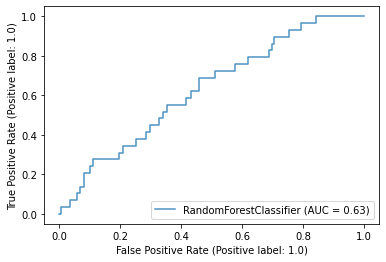

Accuracy = 0.94
Recall = 0.00



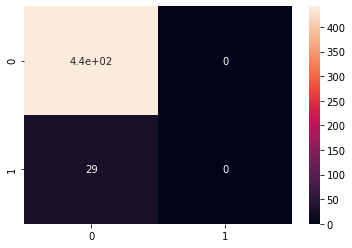

array([[442,   0],
       [ 29,   0]], dtype=int64)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

model = RandomForestClassifier(n_jobs = -1, max_depth = 5, random_state=42,)
model.fit(X4_RFE, Y1)
ax = plt.gca()
rfc_disp = plot_roc_curve(model, X5_RFE,Y2, ax=ax, alpha=0.8)
preds = model.predict(X5_RFE)
confusion_matrix_and_metrics(model,Y2, preds, X5_RFE)
plt.show()

print(f'Accuracy = {accuracy_score(Y2, preds):.2f}\nRecall = {recall_score(Y2, preds):.2f}\n')

In [81]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X1_RFE, Y1)
y_pred  =  classifier.predict(X2_RFE)
from sklearn.metrics import confusion_matrix,accuracy_score
cm1 = confusion_matrix(Y2, y_pred)
ac1 = accuracy_score(Y2,y_pred)

print(f'Accuracy = {accuracy_score(Y2, preds):.2f}\nRecall = {recall_score(Y2, preds):.2f}\n')

Accuracy = 0.94
Recall = 0.00



In [75]:
print(cm)

[[423  19]
 [ 27   2]]


<AxesSubplot:>

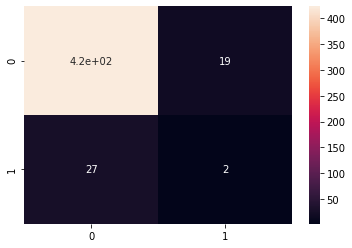

In [78]:
sns.heatmap(cm1, annot=True, annot_kws={"size": 10})

In [79]:
ac1

0.9023354564755839

In [80]:
confusion_matrix_and_metrics(model1,Y2, y_pred, X2_RFE)
plt.show()
print(f'Accuracy = {accuracy_score(Y2, y_pred):.2f}\nRecall = {recall_score(Y2, y_pred):.2f}\n')

NameError: name 'confusion_matrix_and_metrics' is not defined